In [1]:
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
import matplotlib
import pylatexenc
import math

In [2]:
%matplotlib inline

In [3]:
qasm_simulator=Aer.get_backend('qasm_simulator')
statevector_simulator=Aer.get_backend('statevector_simulator')

In [4]:
def run_on_simulators(circuit):
    statevec_job = execute(circuit, backend = statevector_simulator)
    result = statevec_job.result()
    statevec = result.get_statevector()

    num_qubits = circuit.num_qubits
    circuit.measure([i for i in range(num_qubits)], [i for i in range(num_qubits)])
    qasm_job = execute(circuit, backend = qasm_simulator, shots=1024).result()
    counts = qasm_job.get_counts()

    return statevec, counts

In [5]:
circuit = QuantumCircuit(2,2)
statevec, counts = run_on_simulators(circuit)

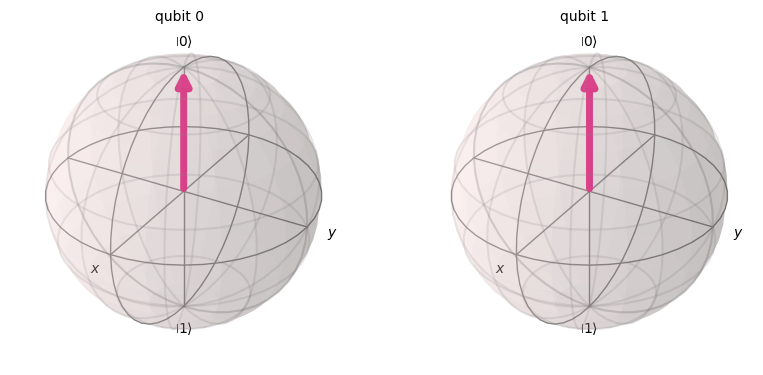

In [6]:
plot_bloch_multivector(statevec)

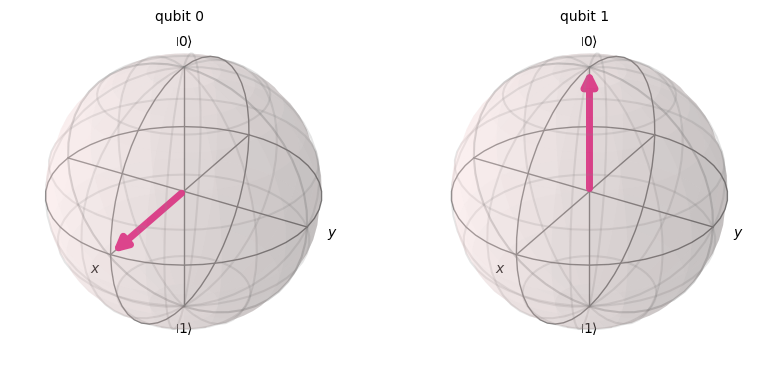

In [7]:
circuit.h(0)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

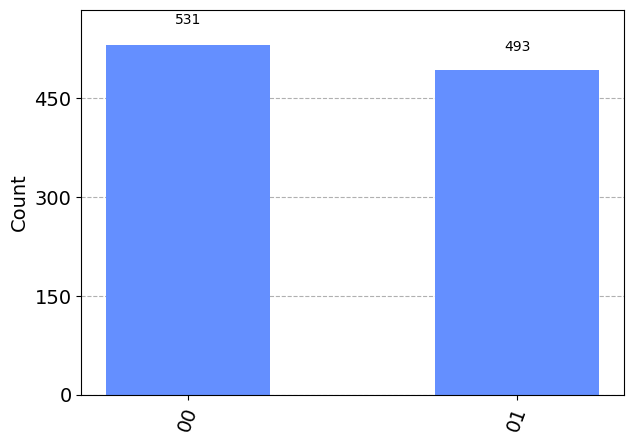

In [8]:
plot_histogram([counts])

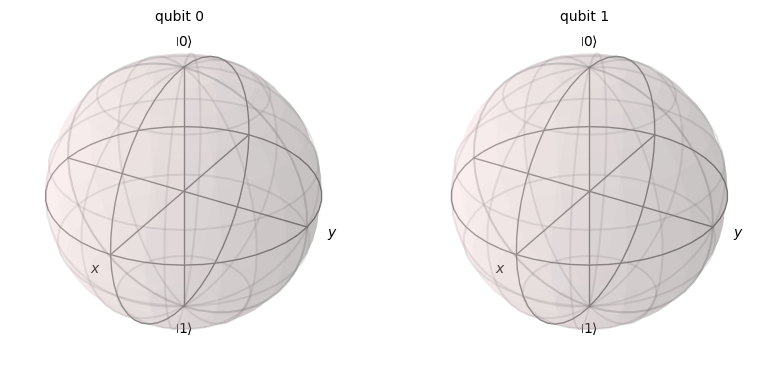

In [12]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
statevec, counts = run_on_simulators(circuit)
plot_bloch_multivector(statevec)

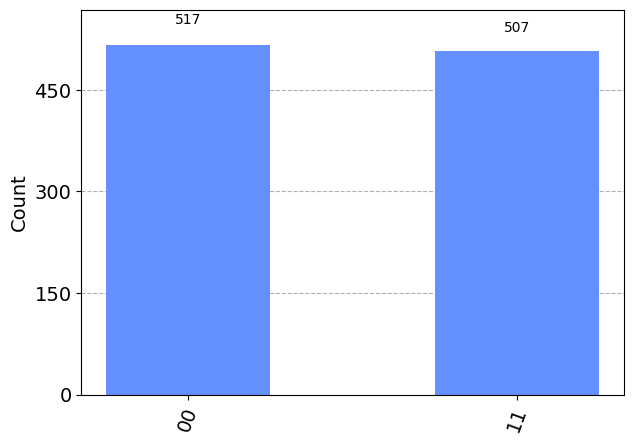

In [13]:
plot_histogram([counts])